<a href="https://colab.research.google.com/github/Kevin-friz/Tarea-1/blob/main/Tarea_1__terminada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina
# **Tarea 1: Introducción a Numpy, Pandas y Matplotlib**

El objetivo de esta tarea es repasar y aprender contenidos básicos de estas librerías que les serán útiles para el resto del curso.

Recordar las instrucciones mencionadas en clases:
1. Para hacer esta tarea tienen que hacer un fork del repositorio en sus
cuentas de GitHub.
2. Luego deben habilitar sus cuentas de Google Colab (cuenta Google requerida)
3. Abrir Google Colab y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
4. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
5. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de respaldar cada avance significativo. Usen comentarios coherentes con cada respaldo "Sección de Numpy completada", "Tarea terminada", no solamente el que pone por defecto.

In [1]:
# Antes de comenzar con la tarea debe correr esta celda para importar las librerías principales a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Numpy (Tiempo estimado: 15 min)

Una de las características principales que vuelven a Numpy tan útil son sus capacidades algebráicas, y la posibilidad de trabajar con conjuntos de datos de N dimensiones, lo que permite acelerar cálculos. Para destacar esto, a continuación se hacen una serie de ejercicios simples donde se pide que realicen las mismas operaciones usando Numpy y las listas de Python, y que luego comparen cuánto tarda cada operación.

Para visualizar la velocidad de Numpy respecto a las listas de Python, deberán correr las funciones que se les pide a continuación con $\textit{%timeit}$, de la siguiente manera:

```
%timeit nombre_funcion(parametro_1, parametro_2)
```

Esto entregará como output el tiempo medio que toma en correr la función y la desviación estándar


### Crear arreglos y listas
A continuación debes crear un par de listas de Python y un par de arreglos de Numpy. Estos arreglos son los que se utilizarán para testear las funciones que crearás en las celdas siguientes.

La primera lista debe ser una secuencia de números enteros desde 1 hasta 49. La segunda debe ir desde 101 hasta 149. Lo mismo para los arreglos.

In [2]:
# Cree las listas aquí
a_list = list(range(1,50))
b_list = list(range(101,150))


# Cree los arreglos aquí
a_arr = np.linspace(1,49,49)
b_arr = np.linspace(101,149,49)


### Suma de listas de elementos

* Cree la función $\textbf{suma_listas}$, que sume 2 listas de python $a$ y $b$.
* Cree la función $\textbf{suma_arrays}$, que sume 2 arrays de numpy $a$ y $b$.
* Compare la eficiencia de las 2 funciones utilizando $\textit{%timeit}$ para cada una

In [3]:
# Cree las funciones aquí

def suma_listas(A,B):
  #lista vacia donde se guardará el resultado
  C = []
  #recorremos todos los elementos de A (que son la misma cantidad de elementos de B)
  for i in range(len(A)):
    #se suman los elementos de A y B, que esten en las mismas posiciones
    x = A[i] + B[i]
    #el resultado de guarda en la nueva lista
    C.append(x)
  return C

def suma_arrays(D,E):
  return D + E



In [4]:
# Compare el tiempo aquí
%timeit suma_listas(a_list, b_list)
%timeit suma_arrays(a_arr, b_arr)


6.57 µs ± 122 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
892 ns ± 248 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Multiplicación de listas de elementos

* Cree la función $\textbf{mupliply_listas}$, que multiplique 2 listas de python $a$ y $b$
* Cree la función $\textbf{mupliply_arrays}$, que multiplique 2 listas de python $a$ y $b$
* Compare la eficiencia de las 2 funciones utilizando $\textit{%timeit}$ para cada una

In [5]:
# Cree las funciones aquí

def mupliply_listas(A,B):
  C = []
  for i in range(len(A)):
    producto = A[i]*B[i]
    C.append(producto)
  return C

def mupliply_arrays(A,B):
  return A*B


In [6]:
# Compare el tiempo aquí
%timeit mupliply_listas(a_list,b_list)
%timeit mupliply_arrays(a_arr,b_arr)


8.27 µs ± 1.99 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
790 ns ± 158 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Aplicación práctica (IMF de Salpeter)

Las Funciones de Masa Inicial (IMF) son muy útil es astronomía pues nos da cuenta de un estimado del número de estrellas que se van a formar en un periodo de formación estelar a partir de un reservorio de masa M [referencia](https://es.wikipedia.org/wiki/Función_de_masa_inicial), lo que permite estudiar poblaciones estelares. En particular, si tenemos un rango de masas $[M_1, M_2]$, se puede demostrar que el número de estrellas que nacerán de un reservorio de masa $\xi_0$ (ignorar unidades) está dada por ecuación $(1)$

$$N = \frac{\xi_0}{1.35} (M_1^{-1.35} - M_2^{-1.35}) \tag{1}$$

Para esta prueba usted debe:

* Crear un array de masas $\textbf{lista_masas}$ que vaya desde $0.2 M_{\odot}$ hasta $80 M_{\odot}$, con pasos de $0.05 M_{\odot}$. Note que para este ejercicio puede ignorar la unidad de la masa.
* Recrear la ecuación $(1)$ como función en python. Considere $\xi_0=1$
* Calcular el número de estrellas que se formarán por intervalo de $\textbf{lista_masas}$, en $[0.2, 0.25], [0.25, 0.3], [0.3, 0.35], ..., [79.9, 79.95] y [79.95, 80]$ utilizando Numpy.
* Luego calcule el número total de estrellas formadas, es decir, sume todos los números de estrellas calculados en el punto anterior.


In [7]:
# Cree el arreglo
lista_masas = np.arange(0.2,80.05,0.05)

In [8]:
# Cree la función que se le pide
def IMF(m1, m2):
  return ( m1**(-1.35) - m2**(-1.35) )/1.35

In [9]:
# Haga los cálculos aquí

total = 0      #variable con el numero total de estrellas
for i in range(len(lista_masas) -1 ):
  x = IMF(lista_masas[i], lista_masas[i+1])  #numero de estrellas por intervalo
  total += x    #se suma el numero de estrellas por intervalo al total de estrellas



## 2. Pandas (Tiempo estimado 20 min)

Para esta sección veremos algunas de las funciones principales que existen dentro de pandas, dando una pincelada a sus capacidades. Como recomendación, puede explorar la [documentación](lista_masas), y mirar el tutorial [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html), pero no es obligatorio para esta parte.

### Creación de datos

Recree el siguiente DataFrame **almacen**:


|        | Manzana | Frutilla | Melón |
|--------|---------|----------|-------|
| Stock inicial  | 25      | 80       | 15    |
| Ventas | 14      | 60       | 6     |


In [10]:
almacen = {'':['Stock inicial','Ventas'],'Manzana':[25,14],'Frutilla':[80,60],'Melón':[15,6]}
Tabla = pd.DataFrame(almacen)
print(Tabla)


                  Manzana  Frutilla  Melón
0  Stock inicial       25        80     15
1         Ventas       14        60      6


Haga ahora un inventario de la cantidad que queda por producto después de las ventas, y añada la fila **bodega** con esta información.

In [11]:
inventario = { 'Manzanas' : almacen['Manzana'][0] - almacen['Manzana'][1], 'Futillas': almacen['Frutilla'][0] - almacen['Frutilla'][1]
              , 'Melones': almacen['Melón'][0] - almacen['Melón'][1]}
almacen = {'':['Stock inicial','Ventas','bodega'],'Manzana':[25,14,inventario['Manzanas']], 'Frutilla':[80,60,inventario['Futillas']]
           ,'Melón':[15,6,inventario['Melones']]}
Tabla = pd.DataFrame(almacen)
print(Tabla)


                  Manzana  Frutilla  Melón
0  Stock inicial       25        80     15
1         Ventas       14        60      6
2         bodega       11        20      9


### Visualización de Tablas
Para esta parte primero debe montar el drive, lo que permite leer archivos guardados en el mismo. Para esto debe correr la celda de abajo.

In [12]:
from google.colab import drive
drive.mount('/content/drive')    # se le debe abrir una pestaña extra pidiendo permisos

Mounted at /content/drive


Importe el dataset (archivo **censo.csv**) utilizando la función **pd.load_csv(path)** y guárdelo como **df_censo**.

En la barra de herramientas ubicada en la izquierda, puede encontrar la ruta (path) al archivo "censo.csv" dentro de su drive. Copie la ruta y cargue dicha base de datos en la siguiente celda como se le indica.

In [13]:
path = '/content/drive/MyDrive/Colab Notebooks/censo.csv'
Df_censo = pd.read_csv(path)
print(Df_censo.head(10))


                               name        city  age  n_siblings
0      Paula_Miguel_Garcia_Gonzalez     Iquique   35           0
1         Maria_Pedro_Jimenez_Lopez    Rancagua   49          -1
2    Carolina_Juan_Jimenez_Gonzalez     Iquique   16           1
3          Lucia_Marta_Jimenez_Sanz    Santiago   42           2
4         Marta_Roberto_Garcia_Sanz  Valparaiso   12           3
5         Roberto_Paula_Lopez_Gomez       Arica   38          -2
6  Pedro_Valentina_Garcia_Hernandez    Santiago   40           0
7         Sofia_Marta_Garcia_Garcia    Santiago   10           1
8   Carolina_Eduardo_Perez_Gonzalez    Santiago   40           0
9     Pedro_Julia_Gonzalez_Gonzalez    Santiago   55           0


Con este dataset se pide hacer lo siguiente:

* Vea los primeros 10 elementos de $\textbf{df_censo}$
* Vea las columnas del dataframe
* Traduzca las columnas a español (manualmente).
* Use la función $\textbf{describe}$ para visualizar la estadística de cada columna del dataframe. ¿Ve algo que no tiene sentido?

In [14]:
# Agregue más celdas si es necesario
# aqui se uso Df_censo['llave en español'] = Df_censo.pop('llave en ingles')
# basicamente se crea otra entrada del diccionario con la llave en español y los elementos son los de la llave en ingles,los que se borran y recuperan con pop
Df_censo['nombre'] = Df_censo.pop('name')
Df_censo['ciudad'] = Df_censo.pop('city')
Df_censo['edad'] = Df_censo.pop('age')
Df_censo['n_hermanos'] = Df_censo.pop('n_siblings')

print(Df_censo.head(10))
Df_censo['nombre'].describe()
Df_censo['ciudad'].describe()
Df_censo['edad'].describe()# edades negativas
Df_censo['n_hermanos'].describe()# hermanos negativos


                             nombre      ciudad  edad  n_hermanos
0      Paula_Miguel_Garcia_Gonzalez     Iquique    35           0
1         Maria_Pedro_Jimenez_Lopez    Rancagua    49          -1
2    Carolina_Juan_Jimenez_Gonzalez     Iquique    16           1
3          Lucia_Marta_Jimenez_Sanz    Santiago    42           2
4         Marta_Roberto_Garcia_Sanz  Valparaiso    12           3
5         Roberto_Paula_Lopez_Gomez       Arica    38          -2
6  Pedro_Valentina_Garcia_Hernandez    Santiago    40           0
7         Sofia_Marta_Garcia_Garcia    Santiago    10           1
8   Carolina_Eduardo_Perez_Gonzalez    Santiago    40           0
9     Pedro_Julia_Gonzalez_Gonzalez    Santiago    55           0


,n_hermanos
count,2000.00000
mean,0.75000
std,1.73234
min,-6.00000
25%,0.00000
50%,0.00000
75%,2.00000
max,7.00000


### Filtar los datos

Repare el dataframe siguiendo los siguientes pasos:

* Descarte los elementos del dataframe donde la edad sea menor a cero.
* Reemplace los casos en que el número de hermanos es menor a cero por cero.
* Descarte los casos en que el mismo nombre aparezca más de una vez (use la función [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates) y mantenga el primer elemento: keep = 'first').


In [17]:
# Agregue más celdas si es necesario
Df_censo = Df_censo[Df_censo['edad'] > 0]
Df_censo.loc[ Df_censo['n_hermanos'] < 0, 'n_hermanos'] = 0 #loc reemplaza todos los valores dentro de la columna que sean menores a 0 por 0
Df_censo.drop_duplicates(keep = 'first')

print(Df_censo)



                              nombre      ciudad  edad  n_hermanos
0       Paula_Miguel_Garcia_Gonzalez     Iquique    35           0
1          Maria_Pedro_Jimenez_Lopez    Rancagua    49           0
2     Carolina_Juan_Jimenez_Gonzalez     Iquique    16           1
3           Lucia_Marta_Jimenez_Sanz    Santiago    42           2
4          Marta_Roberto_Garcia_Sanz  Valparaiso    12           3
...                              ...         ...   ...         ...
1995   Pedro_Pedro_Martinez_Gonzalez      Curico    24           0
1996     Miguel_Carlos_Zapata_Garcia    Santiago    43           0
1997         Diego_Diego_Zapata_Sanz  Valparaiso    43           1
1998       Julia_Sofia_Gonzalez_Sanz      Curico    42           1
1999  Eduardo_Julia_Jimenez_Gonzalez    Santiago    46           0

[1980 rows x 4 columns]


## 3. Matplotlib

Matplotlib es la librería que nos permitirá crear todo tipo de figuras para visualizar nuestros datos ([documentación](https://matplotlib.org/stable/index.html)). A pesar de su popularidad, no posee una gran versatilidad al momento de hacer una visulización interactiva. Sin embargo,su fiabilidad y simplicidad la han hecho una de las librerías fundamentales para la ciencia de datos en Python.

### Visualización simple

Genere un arreglo de 100 números que vayan desde 0 a 4$\pi$.

In [18]:
x_values = np.linspace(0,4*np.pi,100)

Utilizando las funciones **np.sin()** y **np.cos()** de numpy, cree la siguiente función:
$$f(x) = 1.5[\sin(3x+\pi/4)+\cos(2x)] \tag{2}$$

Luego aplique la función al arreglo generado en la celda de arriba y grafique. Haga el plot sin crear una figura, es decir solo usando el comando **plt.plot(x, y)**.


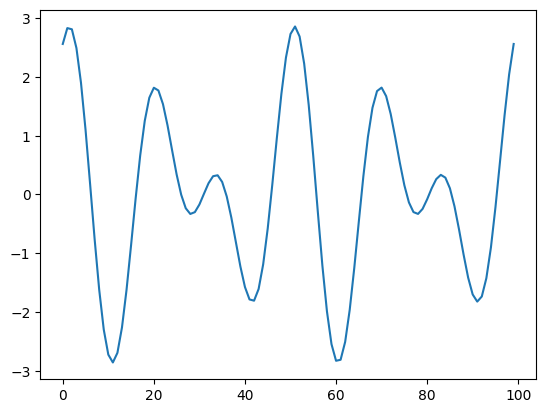

In [19]:
# Escriba la función aquí
def f(x):
  return 1.5*(np.sin(3*x + (np.pi/4)) + np.cos(2*x))


# Haga el plot aquí
plt.plot(f(x_values))


Ahora incluya también en el plot la misma función  pero con un poco de ruido. Para esto simplemente debes sumar la variable **ruido** definida abajo a la función.

Plotee la función ruidosa de color rojo, y en azul la función sin ruido. Incluya además una leyenda con **plt.legend()**. Ojo que para que aparezca la leyenda de la figura, en **plt.plot()** debe incluir el parámetro **label**

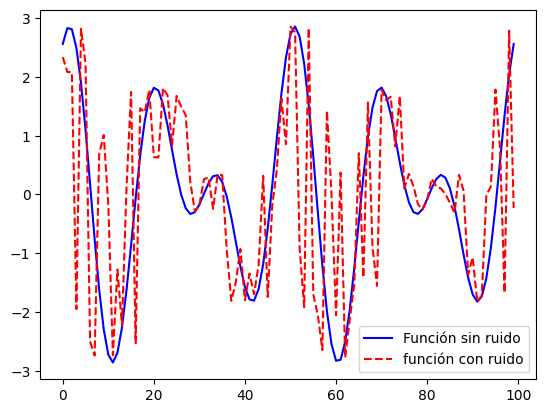

In [20]:
np.random.seed(19680801) # por ahora ignorar esto
ruido = 0.4*np.random.randn(len(x_values))

# Línea para plotear función sin ruido
plt.plot(f(x_values), color = 'blue', label = 'Función sin ruido')

# Línea para plotear función con ruido
plt.plot(f(x_values + ruido), color = 'red', label = 'función con ruido', linestyle = 'dashed')
plt.legend()


Es una buena práctica también el siempre inicializar una figura. Esto además permite definir un tamaño al plot que se va a generar. Use **plt.figure(figsize=(size_x, size_y))** para cambiar el tamaño de la figura y recree todo lo que hizo en la celda anterior.


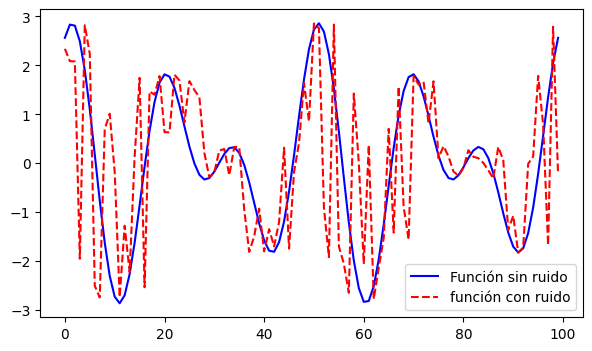

In [21]:
plt.figure(figsize = (7, 4))
plt.plot(f(x_values), color = 'blue', label = 'Función sin ruido')
plt.plot(f(x_values + ruido), color = 'red', label = 'función con ruido', linestyle = 'dashed')
plt.legend()

Para estas funciones, sabemos que tiene un mayor sentido definir el eje x en función de $\pi$ en lugar de números enteros. Haga de nuevo la figura pero ahora utilize la función **plt.xticks()** para reescribir los valores de x como múltiplos de $\pi$. Utilice como labels la lista **xticks_labels** que ya está definida.

Además, tenga en cuenta que se puede escribir texto en latex de la siguiente forma:
```
r'$\pi$'
```



In [22]:
xticks_labels = [r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$']

Como ultimo paso, agregue una grilla con **plt.grid(True)**. Además añada un título a la figura y labels en ambos ejes (x e y) que tengan sentido.


(0.0, 12.566370614359172)

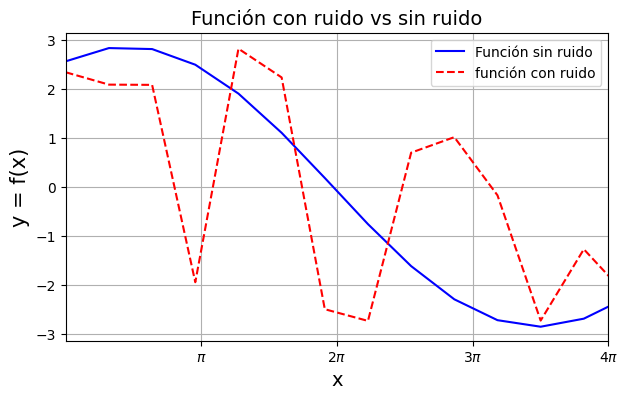

In [37]:
plt.figure(figsize = (7, 4))
plt.plot(f(x_values), color = 'blue', label = 'Función sin ruido')
plt.plot(f(x_values + ruido), color = 'red', label = 'función con ruido', linestyle = 'dashed')
plt.legend()
plt.xticks( [np.pi,2*np.pi,3*np.pi,4*np.pi], xticks_labels)
plt.grid(True)
plt.title('Función con ruido vs sin ruido', fontsize=14)
plt.xlabel('x', fontsize = 14) ; plt.ylabel('y = f(x)',fontsize = 15)
plt.xlim(0, 4*np.pi)

### Visualización distribución de estrellas

El archivo **galaxy2.csv** contiene datos de la posición de estrellas sintéticas de una galaxia. Al igual que en la sección anterior, cargue los datos utilizando **pd.read_csv()**.

In [86]:
# Carge y abra el archivo
galaxia = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/galaxy2.csv')
print(galaxia.head(20))


                     key          x[m]          y[m]          z[m]  \
0    2536799254509432540  9.016510e+17  4.745163e+17  3.009401e+16   
1   16568176108934293527 -9.545587e+16 -2.795457e+17 -2.217165e+16   
2     212848180443948653  4.908724e+17 -1.870607e+18  9.142949e+15   
3     584293945272726282 -8.367689e+17 -2.974291e+17 -4.054180e+15   
4   15485527814176396751  2.343487e+16  2.799849e+17 -2.554723e+16   
5    3355351822461698455 -5.025008e+17 -8.725557e+17 -5.071959e+15   
6   11306543906972088773 -7.294104e+16  2.996010e+17  2.552034e+16   
7     783275702291551918  4.886403e+16 -1.366570e+18  4.799806e+14   
8    2994623897157713080 -1.850651e+17  1.004086e+18 -5.464441e+15   
9   13439637019970929881  1.918695e+17  1.011757e+17  2.188518e+16   
10  16110143086334533373 -5.387431e+17 -6.127350e+17  2.311221e+16   
11   2122209314941748843 -2.312516e+17 -8.220244e+17 -1.202004e+17   
12  16613782161798475724  1.942858e+17  2.676820e+17  2.619590e+15   
13   506448962336939

Vea los primeros 10 elementos del dataframe. ¿Qué tipo de información puede encontrar? Dado el nombre de las columnas, ¿en qué unidades se encuentran?

**Respuesta:** responda aquí a la pregunta

In [39]:
#se puede encontrar las coordenadas espaciales y velocidades en cada eje del espacio
#las unidades de medido son metros y metros por segundo respectivamente

Plotee las estrellas en el plano $[x, y]$ utilizando **plt.plot()**. Para hacer esto hay que plotear solo los marcadores, esto se puede hacer con: **marker=' . ', linestyle='  '**, o simplemente con **' . '**. Recuerde agregar los labels en cada eje.

Text(0.5, 1.0, 'X vs Y')

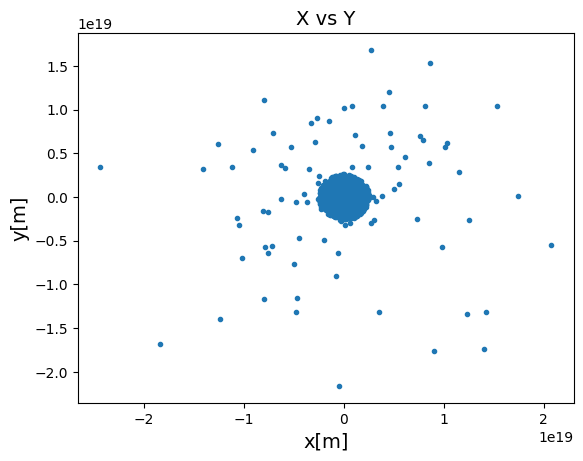

In [42]:
plt.plot(galaxia['x[m]'], galaxia['y[m]'], linestyle = '', marker  = '.')
plt.xlabel('x[m]', fontsize = 14 ) ; plt.ylabel('y[m]', fontsize = 14)
plt.title('X vs Y', fontsize = 14)


Se puede ver que muchas de las estrellas se extienden muy lejos de la galaxia. Para simplificar la visualización setee un **plt.xlim()** y **plt.ylim()** en el rago que considere que funcione mejor (Recomendación, como los números son muy grandes, use la notación $1eN$, con $N$ el orden de magnitud, para facilitar la escritura).

Adicionalmente, cuando se trabaja con marcadores, podemos usar el parámetro **markersize** para modificar su tamaño. El plot anterior muestra con bastante claridad las estrellas que están más lejanas, pero dificulta la visualización de las regiones más centrales de la galaxia. Actualice el tamaño de los marcadores a $0.5$, de manera que sea más suave la visualización de la distribución de estrellas. Plotee además las estrellas vistas en el plano $[x, y]$, $[x, z]$, $[y, z]$.

Recuerde agregar los labels en cada eje.

Póngase creativo con los gráficos, defina tamaños de la figura, agregue colores, defina los tamaños de los labels, etc.

(-2e+18, 2e+18)

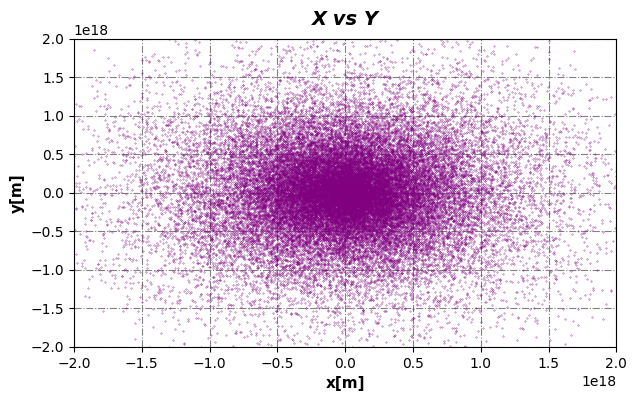

In [119]:
# Grafique vista en plano [x, y] aquí
plt.figure(plt.figure(figsize = (7, 4)))
plt.plot(galaxia['x[m]'], galaxia['y[m]'], color = 'purple', marker  = '.', markersize = 0.5, linestyle = '')

plt.title('X vs Y', fontsize = 14, fontweight = 'bold', fontstyle = 'oblique', pad = 10)
plt.xlabel('x[m]', fontsize = 11 , fontweight = 'bold') ; plt.ylabel('y[m]', fontsize = 11, fontweight = 'bold')
plt.grid(True, color = 'gray', linestyle = '-.')

plt.xlim(-20e17, 20e17) ; plt.ylim( -2e18, 2e18)

(-1e+17, 1e+17)

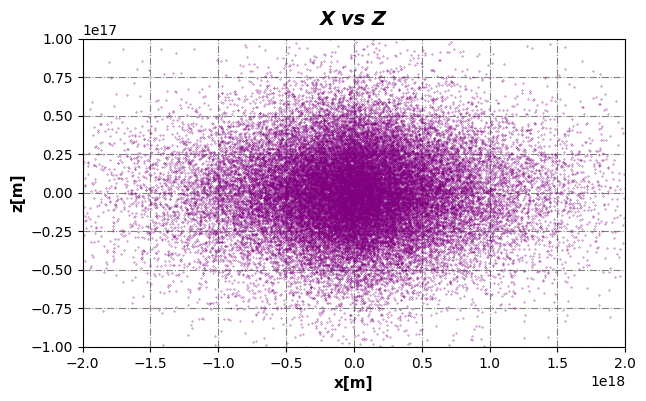

In [120]:
# Grafique vista en plano [x, z] aquí
plt.figure(plt.figure(figsize = (7, 4)))
plt.plot(galaxia['x[m]'], galaxia['z[m]'], color = 'purple', marker  = '.', markersize = 0.5, linestyle = '')

plt.title('X vs Z', fontsize = 14, fontweight = 'bold', fontstyle = 'oblique', pad = 10)
plt.xlabel('x[m]', fontsize = 11 , fontweight = 'bold') ; plt.ylabel('z[m]', fontsize = 11, fontweight = 'bold')
plt.grid(True, color = 'gray', linestyle = '-.')

plt.xlim(-20e17, 20e17) ; plt.ylim( -1e17, 1e17)


(-1e+17, 1e+17)

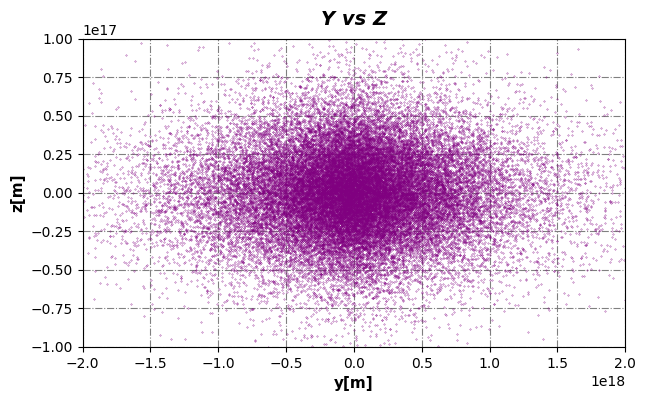

In [121]:
# Grafique vista en plano [y, z] aquí
plt.figure(plt.figure(figsize = (7, 4)))
plt.plot(galaxia['y[m]'], galaxia['z[m]'], color = 'purple', marker  = '.', markersize = 0.5, linestyle = '')

plt.title('Y vs Z', fontsize = 14, fontweight = 'bold', fontstyle = 'oblique', pad = 10)
plt.xlabel('y[m]', fontsize = 11 , fontweight = 'bold') ; plt.ylabel('z[m]', fontsize = 11, fontweight = 'bold')
plt.grid(True, color = 'gray', linestyle = '-.')

plt.xlim(-20e17, 20e17) ; plt.ylim( -1e17, 1e17)


#### Distribuciones

Calcule la distancia $r$ y ángulo $\theta$ de cada una de las estrellas y añada estos valores a las columnas del dataframe original. Donde

$r = \sqrt{x^2 + y^2 + z^2}$

$θ = \arctan(y/x)$


In [98]:
# las distancias x, y e z se convierten en arrays para facilitar los calculos
x = np.array(galaxia['x[m]']) ; y = np.array(galaxia['y[m]']) ; z = np.array(galaxia['z[m]'])
r = np.sqrt( x**2 + y**2 + z**2 )
tetha = np.arctan(y/x)

# se agregan las 2 columnas con los datos calculados
galaxia['r'] = r ; galaxia['tetha'] = tetha

print(galaxia)

                        key          x[m]          y[m]          z[m]  \
0       2536799254509432540  9.016510e+17  4.745163e+17  3.009401e+16   
1      16568176108934293527 -9.545587e+16 -2.795457e+17 -2.217165e+16   
2        212848180443948653  4.908724e+17 -1.870607e+18  9.142949e+15   
3        584293945272726282 -8.367689e+17 -2.974291e+17 -4.054180e+15   
4      15485527814176396751  2.343487e+16  2.799849e+17 -2.554723e+16   
...                     ...           ...           ...           ...   
40095   8972477052627890130 -5.257426e+17 -2.160534e+19 -1.687303e+18   
40096   3695764516254316728  1.963205e+17  1.183779e+18  4.895338e+17   
40097  17617397667571159511 -4.528748e+18 -4.665755e+18  3.232435e+18   
40098  16130134547917784508  2.947325e+18 -3.515739e+15  1.659993e+18   
40099  11941135087396799780 -2.541212e+18  2.372081e+18  1.282449e+18   

            vx[m/s]       vy[m/s]       vz[m/s]             r     tetha  
0     -1.625572e+06  2.845114e+06 -3.486599e+04  

Finalmente, visualize la distribución de $r$ y $\theta$ con un histograma. Esto se puede contruir desde cero con matplotlib, sin embargo pandas simplifica hacer análisis como estos, permitiendo rápidamente hacer diferentes análisis estadísticos. El siguiente codigo muestra como se puede plotear un histograma a partir de un dataframe de Pandas:


```
dataframe.plot.hist(y=column_name, bins=n_bins)
```

Utilice una escala logarítmica en el eje vertical del histograma de la coordenada radial ($r$). Use la cantidad de bins que considere que representen bien la distribución.



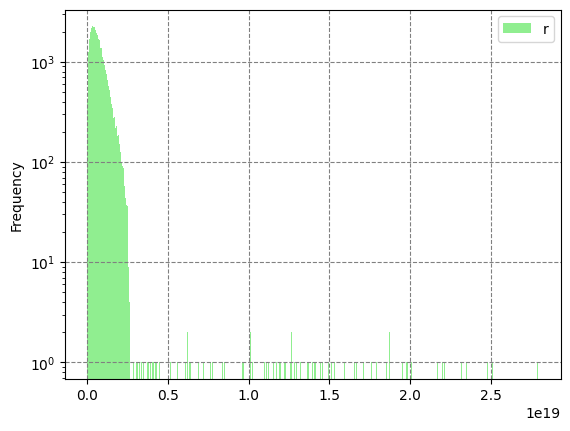

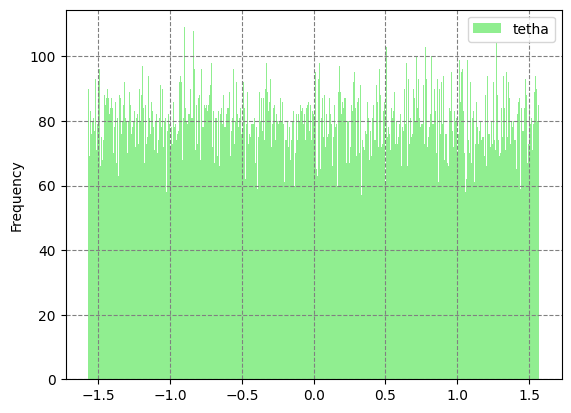

In [109]:
galaxia.plot.hist( y = 'r', bins=500, color = 'lightgreen' )
plt.grid(True, color = 'gray', linestyle = '--')
plt.yscale('log')
galaxia.plot.hist( y='tetha', bins=500, color = 'lightgreen')
plt.grid(True, color = 'gray', linestyle = '--')
